# প্রজেক্ট ৭ঃ ক্লাসিফিকেশন প্রবলেম (Breast cancer dataset)

# Load Dataset

In [65]:
# import librearys
import numpy as np
from numpy import arange
import pandas as pd
from pandas import set_option
from sklearn import datasets

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline

# data preparation and evaluation model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Machine learning algorithm and pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Ensemble model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Performance measure matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [92]:
# load dataset
cancer = datasets.load_breast_cancer()

# Exploratory Data analysis

In [3]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
print(cancer.target_names)

['malignant' 'benign']


In [7]:
print(cancer.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [8]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [10]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [15]:
df1 = pd.DataFrame(cancer.target, columns=['Target'])

In [17]:
dataset = df.join(df1)

In [19]:
dataset.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


# Data Visualization

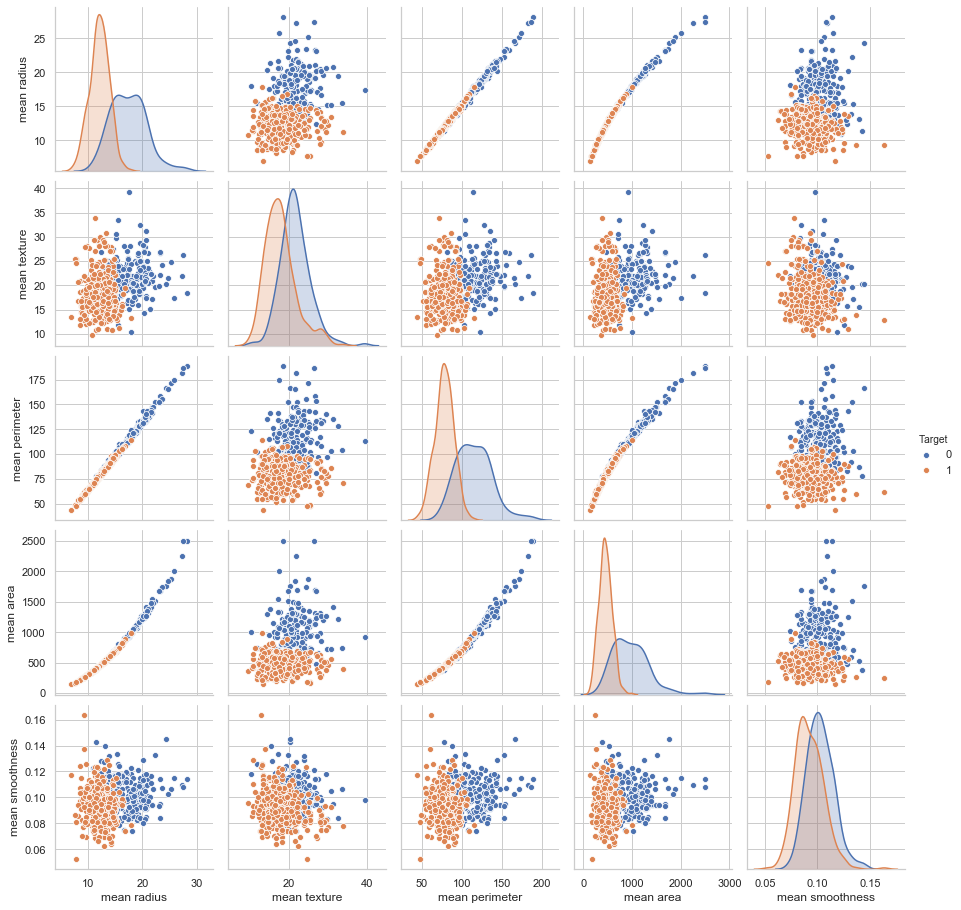

In [25]:
var = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness']
sns.set(style='whitegrid', color_codes=True)
sns.pairplot(dataset, vars=var, hue='Target' )

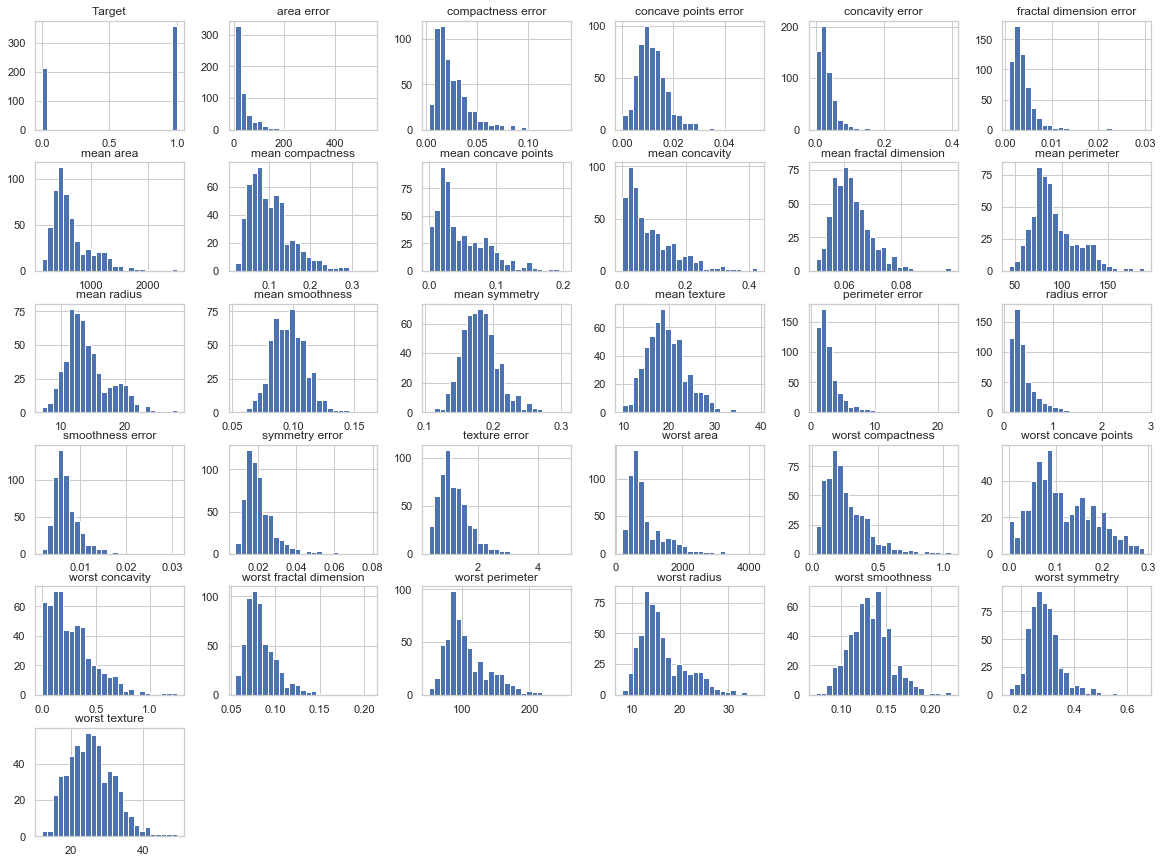

In [26]:
dataset.hist(bins=25, figsize=(20, 15))
plt.show()

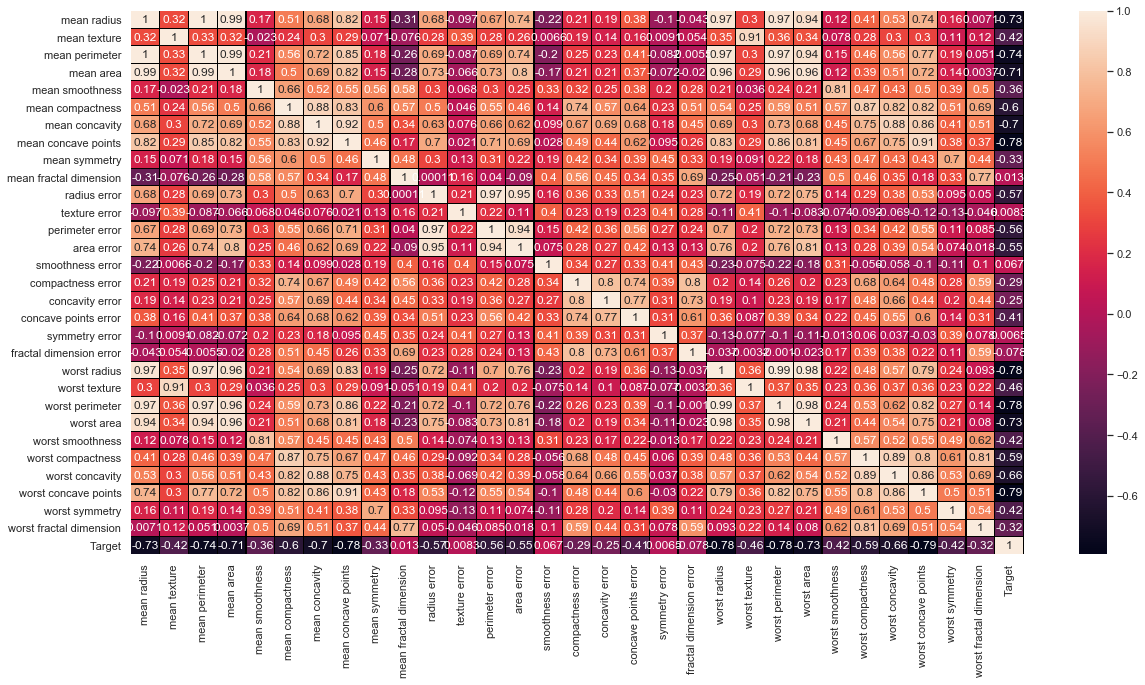

In [33]:
# Correlation heatmap
corr = dataset.corr()
fig = plt.figure(figsize=(20,10))
sns.heatmap(corr, linecolor='black', linewidths=.1, annot=True)

# Validation Dataset

In [34]:
# train test split

X = cancer.data
Y = cancer.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=7)

# Spot-Check Algorithms

In [102]:
# Spot-Check Algorithms
models = []
# models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)

LDA: 95.386473 (0.033254)
KNN: 93.425121 (0.036500)
CART: 91.657005 (0.054636)
NB: 93.628019 (0.031752)
SVM: 90.753623 (0.055156)


In [107]:
results = np.array(results).transpose()
df = pd.DataFrame(results, columns=names)
df.iplot(kind='box')


,LDA,KNN,CART,NB,SVM
0,0.956522,0.956522,0.869565,0.934783,0.978261
1,0.978261,0.869565,0.934783,0.978261,0.891304
2,0.956522,0.913043,0.978261,0.956522,0.934783
3,0.891304,0.913043,0.891304,0.891304,0.913043
4,0.978261,0.934783,0.869565,0.913043,0.891304
5,0.955556,0.955556,0.888889,0.955556,0.866667
6,0.977778,0.955556,0.933333,0.955556,0.933333
7,0.888889,0.888889,0.822222,0.911111,0.777778
8,0.977778,0.955556,1.000000,0.977778,0.977778
9,0.977778,1.000000,0.977778,0.888889,0.911111


# Spot-Check Algorithms(Standardize and Normalize)

In [108]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Rescale', MinMaxScaler()), ('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Rescale', MinMaxScaler()),('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Rescale', MinMaxScaler()),('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledLASSO', Pipeline([('Rescale', MinMaxScaler()),('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVR', Pipeline([('Rescale', MinMaxScaler()),('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)

ScaledLR: 95.386473 (0.033254)
ScaledKNN: 95.396135 (0.040699)
ScaledCART: 91.657005 (0.052797)
ScaledLASSO: 93.628019 (0.033143)
ScaledSVR: 96.483092 (0.020203)


In [109]:
results = np.array(results).transpose()
df = pd.DataFrame(results, columns=names)
df.iplot(kind='box')


# Tunning Algorithm

# Tunning SVM

In [68]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
scaler = Normalizer().fit(rescaledX)
rescaledX = scaler.transform(rescaledX)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.980145 using {'C': 1.3, 'kernel': 'rbf'}
0.973478 (0.019298) with: {'C': 0.1, 'kernel': 'linear'}
0.966812 (0.022843) with: {'C': 0.1, 'kernel': 'poly'}
0.951353 (0.032728) with: {'C': 0.1, 'kernel': 'rbf'}
0.969130 (0.022382) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.973478 (0.021706) with: {'C': 0.3, 'kernel': 'linear'}
0.971304 (0.019960) with: {'C': 0.3, 'kernel': 'poly'}
0.962415 (0.028229) with: {'C': 0.3, 'kernel': 'rbf'}
0.973478 (0.021706) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.969130 (0.024489) with: {'C': 0.5, 'kernel': 'linear'}
0.975700 (0.018363) with: {'C': 0.5, 'kernel': 'poly'}
0.964686 (0.024705) with: {'C': 0.5, 'kernel': 'rbf'}
0.971353 (0.024162) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.969130 (0.024489) with: {'C': 0.7, 'kernel': 'linear'}
0.973527 (0.016555) with: {'C': 0.7, 'kernel': 'poly'}
0.969130 (0.017661) with: {'C': 0.7, 'kernel': 'rbf'}
0.969130 (0.024489) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.973527 (0.023793) with: {'C': 0.9, 'kernel': 'linear'

# Tunning KNN

In [67]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
scaler = Normalizer().fit(rescaledX)
rescaledX = scaler.transform(rescaledX)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.962415 using {'n_neighbors': 11}
0.938116 (0.042049) with: {'n_neighbors': 1}
0.955749 (0.040978) with: {'n_neighbors': 3}
0.960242 (0.027758) with: {'n_neighbors': 5}
0.960242 (0.027758) with: {'n_neighbors': 7}
0.960242 (0.023937) with: {'n_neighbors': 9}
0.962415 (0.024482) with: {'n_neighbors': 11}
0.962415 (0.024482) with: {'n_neighbors': 13}
0.962415 (0.024482) with: {'n_neighbors': 15}
0.960193 (0.027804) with: {'n_neighbors': 17}
0.960193 (0.027804) with: {'n_neighbors': 19}
0.960193 (0.027804) with: {'n_neighbors': 21}


# Ensamble Method

In [69]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
scaler = Normalizer().fit(rescaledX)
rescaledX = scaler.transform(rescaledX)
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.960193 (0.034178)
GBM: 0.955797 (0.035923)
RF: 0.955749 (0.039754)
ET: 0.962415 (0.031467)


# Finalize Model(SVM)

In [87]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.3)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
c = confusion_matrix(Y_test, predictions)

0.9824561403508771
[[38  2]
 [ 0 74]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



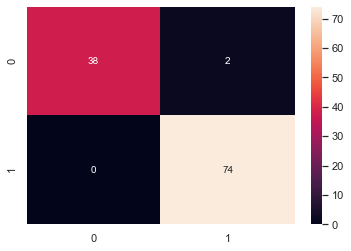

In [84]:
sns.heatmap(c, annot=True)